* Student Name: Jane Mwangi
* TM : Samuel Karu
* Cohort : Part-time 4 Data Science 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

## Project Objective

Identify and prevent customer churn within a telecommunications company to enhance business performance.


## Business Problem

Customer churn, the departure of customers, impacts revenue and profitability. The project aims to identify reasons for churn and develop strategies for its reduction in the telecom industry.

## Methods

The project utizes the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which encompasses several stages:
* Business understanding
* Data Understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

During the modeling phase, a range of predictive models will be constructed and assessed. 
The process will commence with a fundamental logistic regression model and progress towards more intricate models like Decision Trees. 
Performance evaluation will be conducted using metrics such as accuracy, precision, recall, and F1-score.

## Data Understanding


In [2]:
# Loading the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [3]:
# Count the number of rows and columns
data.shape


(3333, 21)

In [4]:
# Get an overview of the DataFrame, including data types
data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Summary of Features in the Datset
*	state: the state the customer lives in
*	account length: the number of days the customer has had an account
*	area code: the area code of the customer
*	phone number: the phone number of the customer
*	international plan: true if the customer has the international plan, otherwise false
*	voice mail plan: true if the customer has the voice mail plan, otherwise false
*	number vmail messages: the number of voicemails the customer has sent
*	total day minutes: total number of minutes the customer has been in calls during the day
*	total day calls: total number of calls the user has done during the day
*	total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
*	total eve minutes: total number of minutes the customer has been in calls during the evening
*	total eve calls: total number of calls the customer has done during the evening
*	total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
*	total night minutes: total number of minutes the customer has been in calls during the night
*	total night calls: total number of calls the customer has done during the night
*	total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
*	total intl minutes: total number of minutes the user has been in international calls
*	total intl calls: total number of international calls the customer has done
*	total intl charge: total amount of money the customer was charged by the Telecom company for international calls
*	customer service calls: number of calls the customer has made to customer service
*	churn: true if the customer terminated their contract, otherwise false


In [5]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Preprocessing

In [6]:
# check missing values
data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in our dataset

In [7]:
# checking for duplicates
data.duplicated().sum()

0

There are no duplicates in our data

## Exploratory Data Analysis (EDA)


In [8]:
# Calculate the number of unique values for each column in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* We can see that every phone number is unique with 3333 entries.
* We will remove 'phone number' from dataset because it doesn't add value to the analysis, and it can actually make the analysis more challenging due to its unique nature. 

In [9]:
# Dropping phone number

data.drop('phone number', axis=1, inplace=True)


We will Investigate area code and state in order to see if we should keep them or drop them from our analysis

We first look at the relationship between area code and state

<Figure size 2592x1296 with 0 Axes>

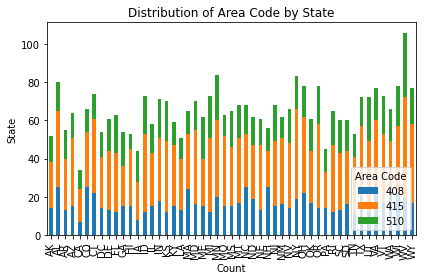

In [10]:
# Create a cross-tabulation of 'state' and 'area code'
cross_tab = pd.crosstab(data['state'], data['area code'])

# Double the horizontal size of the grouped bar chart
plt.figure(figsize=(36, 18))  # Adjust the width (36) as needed

ax = cross_tab.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of Area Code by State')
plt.legend(title='Area Code', loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

The graph above shows that the 3 area codes are distributed throughout the different states.

Next we want to look at the relationship between area code and churn

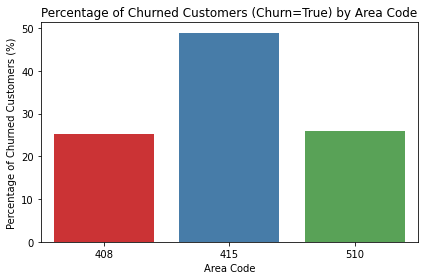

In [11]:
# Calculate the total number of churned customers by area code
total_churned_by_area = data[data['churn'] == True]['area code'].value_counts()

# Calculate the percentage of churned customers by area code
churn_percentages = (total_churned_by_area / total_churned_by_area.sum()) * 100

# Sort the area codes by percentage in descending order
churn_percentages = churn_percentages.sort_values(ascending=False)

# Create a bar plot to show the percentage of churned customers by area code
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette='Set1')

# Set labels and title
plt.xlabel('Area Code')
plt.ylabel('Percentage of Churned Customers (%)')
plt.title('Percentage of Churned Customers (Churn=True) by Area Code')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

Area code 415 has a high churn rate, close to 50%, compared to 408 and 510. 
Our data does not give further information regarding this area codes that would explain the diffrence.

We now look at the relationship between state and churn

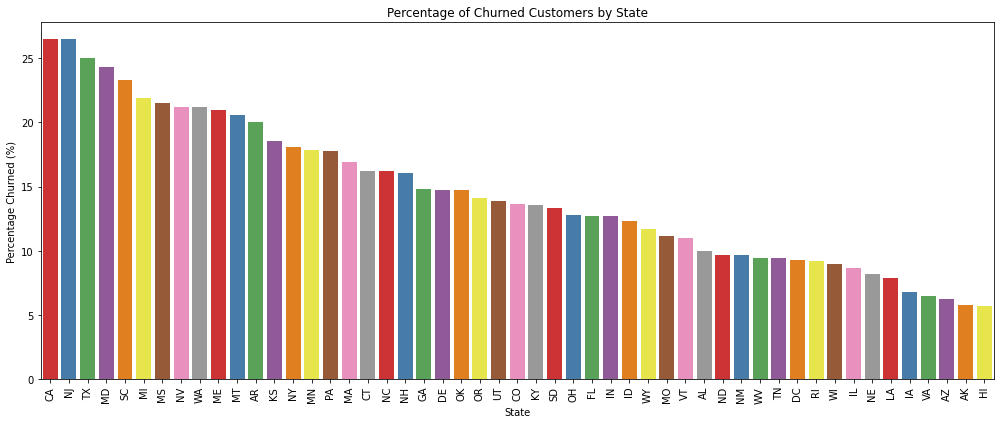

In [12]:
# Calculate the percentage of churned customers by state
churn_percentages = (data[data['churn'] == True]['state'].value_counts() / data['state'].value_counts()) * 100

# Sort the states by percentage in descending order
churn_percentages = churn_percentages.sort_values(ascending=False)

# Create a bar plot to show the percentage of churned customers by state
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette='Set1')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Percentage Churned (%)')
plt.title('Percentage of Churned Customers by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


The below plot narrows down to top 10 states with the highest churn rates

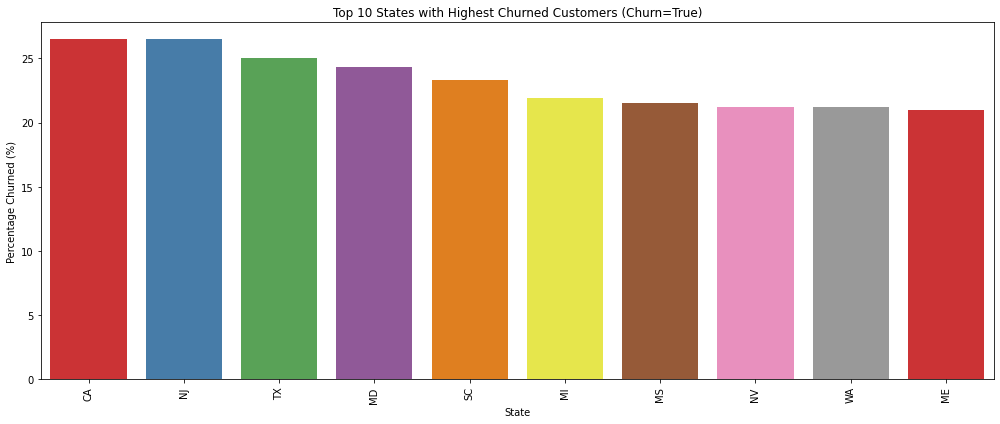

In [13]:
# Calculate the percentage of churned customers by state
churn_percentages = (data[data['churn'] == True]['state'].value_counts() / data['state'].value_counts()) * 100

# Sort the states by percentage in descending order
churn_percentages = churn_percentages.sort_values(ascending=False)

# Get the top 10 states with the highest churn percentages
top_10_states = churn_percentages.head(10)

# Create a bar plot to show the percentage of churned customers for the top 10 states
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='Set1')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Percentage Churned (%)')
plt.title('Top 10 States with Highest Churned Customers (Churn=True)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

The last 3 graphs indicate that there are area codes and states with high churn rates compared to others. Our data does not have any futher information regarding these states or area codes therefore we cannot do a further analysis on them.

We will therefore drop state and area code from our dataset

It's important for telecom companies to conduct region-specific research to understand and address the factors driving churn and retain customers effectively.

Some of the possible reasons could be:

* Demographic variations. States with younger populations may experience higher churn as younger customers switch providers more frequently.

* Competition in the telecommunications industry varies by state, impacting churn rates. Highly competitive states may see more customer turnover due to better deals and offers.

* Economic conditions within a state influence churn rates. In states with a stronger economy, customers may switch providers for better financial stability.

* Provider reputation varies by state and can affect churn rates. States with negative provider experiences may have higher churn.

* Service quality varies by state, with poorer quality leading to higher churn rates as customers seek better options.

* Telecom providers' marketing campaigns and promotions can target specific regions. States with aggressive marketing may experience higher customer turnover due to these efforts.

* State-level regulations and policies regarding telecommunications can influence churn rates. Consumer-friendly regulations may lead to lower churn.

* Cultural factors and customer loyalty differ by region. Some states may have a culture of brand loyalty, reducing churn, while others may be more price-sensitive.

* Population density, Densely populated states offer more options, leading to higher provider switching.

* Technological advancements influence churn rates, as states with faster technology adoption may see higher customer turnover.

In [14]:
# Dropping 'area code' and 'state'
data.drop(['area code', 'state'], axis=1, inplace=True)


### Splitting of data to Numerical and categorical

In [15]:
# Select categorical columns (object or category data types)
cat_columns = data.select_dtypes(include=['object', 'bool'])

# Select numeric columns (int or float data types)
cont_columns = data.select_dtypes(include=['int64', 'float'])


In [16]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   international plan  3333 non-null   object
 1   voice mail plan     3333 non-null   object
 2   churn               3333 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 55.5+ KB


In [17]:
cont_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

### Categorical Feature Analysis

* The 'churn' feature will serve as the target variable.It represents whether a customer has concluded their contract with SyriaTel. 
* On the 'churn' feature a value of 'True' signifies contract termination, while 'False' suggests that they have not terminated the contract and still maintain an active account.

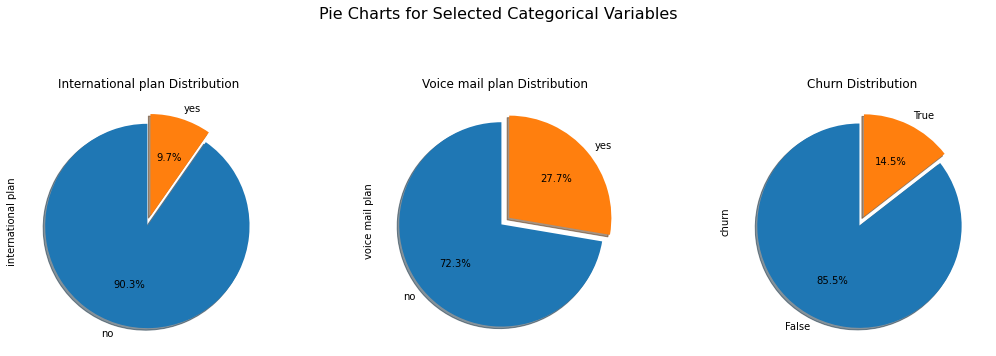

In [18]:
# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Pie Charts for Selected Categorical Variables', fontsize=16)

# Plot pie charts for each selected categorical variable
for i, col in enumerate(cat_columns):
    ax = axes[i]
    
    # Calculate value counts and plot the pie chart
    data[col].value_counts().plot.pie(explode=[0.05] * len(data[col].unique()), autopct='%1.1f%%', startangle=90, shadow=True, ax=ax)
    ax.set_title(f'{col.capitalize()} Distribution')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()



Out of the total 3,333 customers
* 14.5% have left, while the remaining 85.5% have remained
* 9.7% have an international plan
* 27.7% have a voice mail plan

The distribution of these binary classes reveals data imbalance, which should be addressed before modeling to prevent potential inaccuracies in model predictions

### Numerical Feature Analysis

#### Checking for Multicollinearity

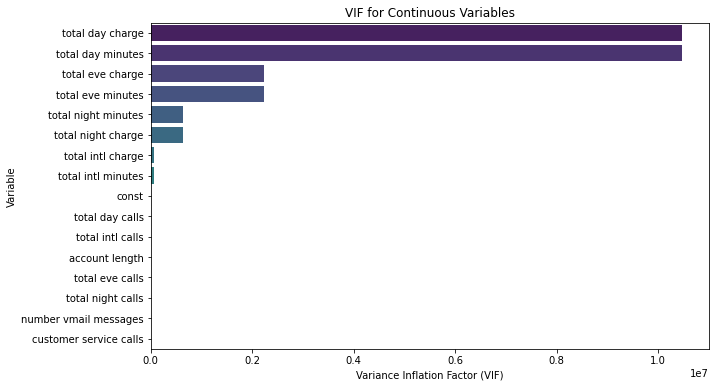

In [19]:
cat_columns = data.select_dtypes(include=['object', 'bool'])
cont_columns = data.select_dtypes(include=['int64', 'float'])

# Assuming 'data' is your DataFrame containing the continuous variables
X = cont_columns

# Add a constant term for the intercept
X = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the VIF values in descending order for the plot
vif = vif.sort_values(by='VIF', ascending=False)

# Create a bar chart to visualize VIF values using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif, palette='viridis')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.title('VIF for Continuous Variables')
plt.show()


There are several variables related to call duration and charges, such as "total day minutes," "total day charge," "total eve minutes," "total eve charge," "total night minutes," "total night charge," "total intl minutes," and "total intl charge," all of which have exceptionally high VIF values. This suggests that there is significant multicollinearity among these call-related variables, which is not surprising given their inherent relationships.

#### Correlation matrix for numeric columns

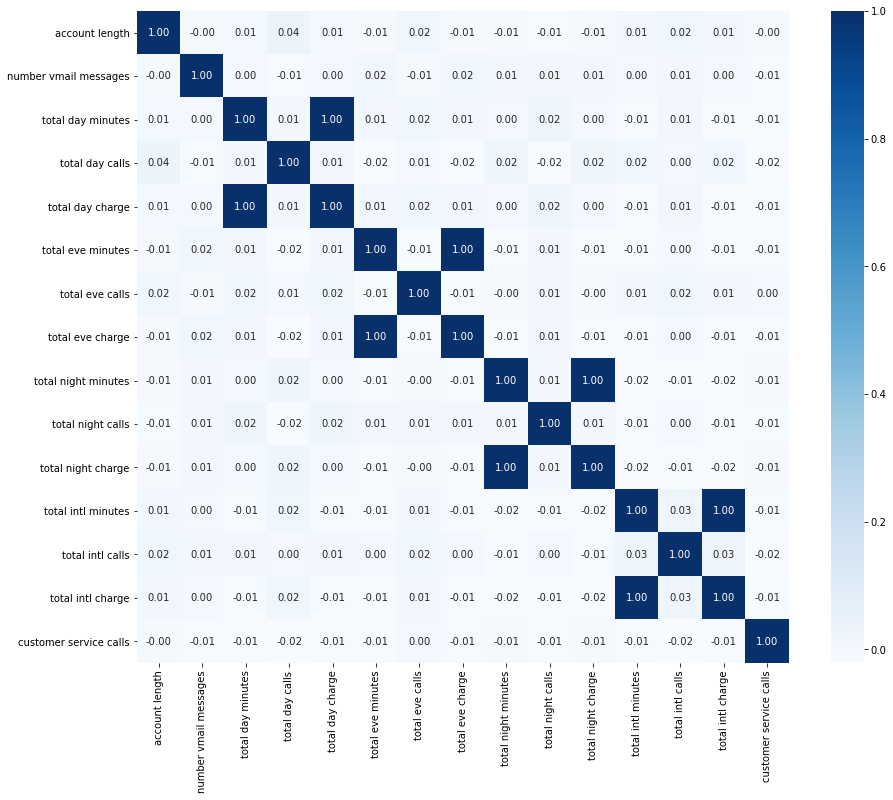

In [20]:
cont_columns = data.select_dtypes(include=['int64', 'float'])
corr_mat = cont_columns.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()  # This line displays the heatmap and suppresses other text output



* The majority of the features show no significant correlation, but there are instances of perfect correlation.

    * Total day charge and total day minutes exhibit a complete positive correlation.
    * Total eve charge and total eve minutes display a full positive correlation.
    * Total night charge and total night minutes demonstrate a complete positive correlation.
    * Total int charge and total int minutes also reveal a complete positive correlation.
    
* The existence of perfect correlation is logical in these cases because the charge is a direct consequence of the minutes used.

* A perfect correlation of 1 signifies the presence of perfect multicollinearity, which affects nonlinear models differently than linear models. While some nonlinear models are impacted by perfect multicollinearity, others remain unaffected.

#### Distribution patterns for certain features

<ipython-input-21-6d3d626621a9>:13: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


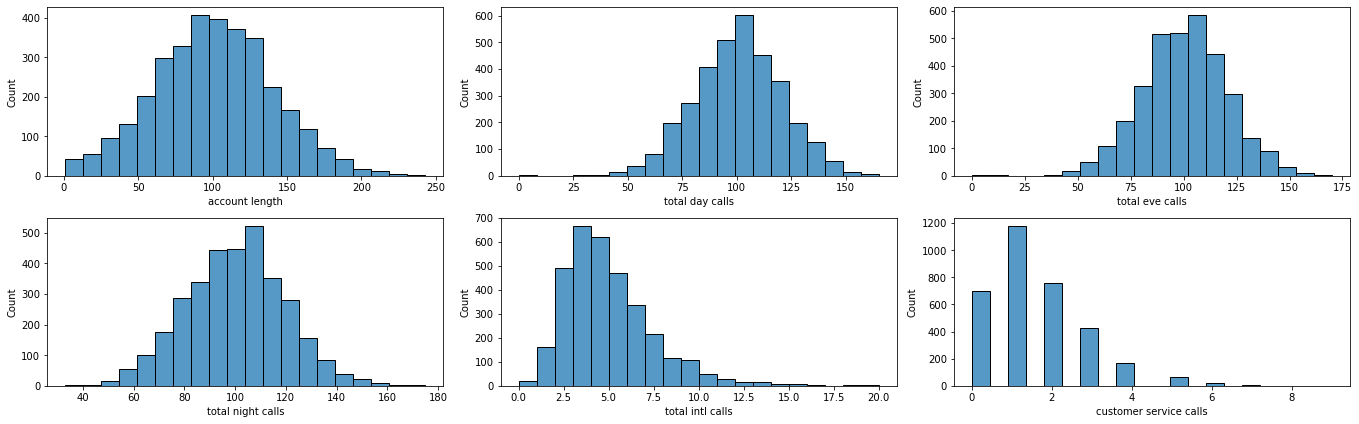

In [21]:
# Create a 2x3 grid of subplots
f, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)

# Plot histograms for each variable
sns.histplot(data["account length"], bins=20, ax=ax[0, 0])
sns.histplot(data["total day calls"], bins=20, ax=ax[0, 1])
sns.histplot(data["total eve calls"], bins=20, ax=ax[0, 2])
sns.histplot(data["total night calls"], bins=20, ax=ax[1, 0])
sns.histplot(data["total intl calls"], bins=20, ax=ax[1, 1])
sns.histplot(data["customer service calls"], bins=20, ax=ax[1, 2])

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


* Most distribution plots follow a normal distribution pattern, while 'customer service calls' and 'Total international calls' are left-skewed.
* 'Customer service calls' exhibits multiple peaks, indicating the presence of distinct groups within the population, likely due to its integer nature.
* Majority of the users make 1 call to cuntomer service while a number make more than 4.


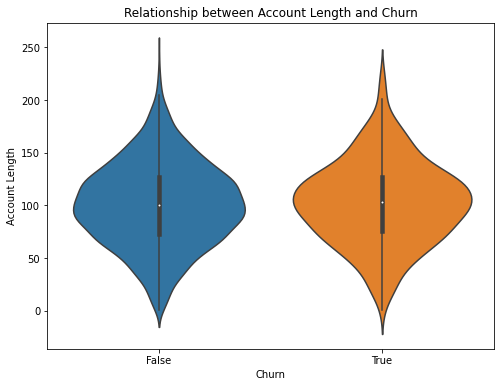

In [22]:
# Create a violin plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.violinplot(x='churn', y='account length', data=data)
plt.title('Relationship between Account Length and Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()



There is no significance between the account length makes on churning or not.
Therefore we will drop account length from our dataset.

In [23]:
# Dropping 'area code' and 'state'
data.drop(['account length'], axis=1, inplace=True)

In summary we have dropped
* phone number
* area code
* state
* account length

### Normalizing the continuous features

In [24]:
# Continuous columns
cont_columns = data.select_dtypes(include=['int64', 'float']).columns

# Create an instance of the scaler
scaler = StandardScaler()

# Transform and scale the data
data[cont_columns] = scaler.fit_transform(data[cont_columns])


### Encoding Categorical Columns

In [25]:
# Categorical columns
cat_columns = data.select_dtypes(include=['object', 'bool']).columns

# Use get_dummies to one-hot encode and drop the first category
data = pd.get_dummies(data, columns=cat_columns, drop_first=True)

# Display the first few rows of the DataFrame
data.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_True
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0,0


# Data Modeling

In [26]:
# predators
X = data.drop('churn_True', axis=1)

# target
y = data['churn_True']

X.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0


## Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## 1. Fitting, Prediction and Evaluation using a Logistic Regression

In [28]:
# Create an instance of Logistic Regression Model
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Once the model is fitted, we use it to make predictions on new data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [30]:
# Calculate the evaluation metrics for training set predictions
train_precision = round(precision_score(y_train, y_train_pred), 3)
train_accuracy = round(accuracy_score(y_train, y_train_pred), 3)
train_f1 = round(f1_score(y_train, y_train_pred), 3)
train_recall = round(recall_score(y_train, y_train_pred), 3)

# Calculate the evaluation metrics for test set predictions
test_precision = round(precision_score(y_test, y_test_pred), 3)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)
test_f1 = round(f1_score(y_test, y_test_pred), 3)
test_recall = round(recall_score(y_test, y_test_pred), 3)

# Print the evaluation metrics for training set predictions
print("Logistic Regression Results:")

# Print an empty line
print()

print("Training Set Metrics:")
print("Precision:", train_precision)
print("Accuracy:", train_accuracy)
print("F1 Score:", train_f1)
print("Recall:", train_recall)

# Print an empty line
print()

# Print the evaluation metrics for test set predictions
print("Test Set Metrics:")
print("Precision:", test_precision)
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Recall:", test_recall)


Logistic Regression Results:

Training Set Metrics:
Precision: 0.576
Accuracy: 0.859
F1 Score: 0.302
Recall: 0.204

Test Set Metrics:
Precision: 0.543
Accuracy: 0.872
F1 Score: 0.318
Recall: 0.225


* Training Set Metrics:

    * Precision: This model's precision on the training set is 0.576. This means that when this model predicts a positive outcome, it's correct 57.6% of the time, which is quite decent.

    * Accuracy: The training set accuracy is 0.859, indicating that, based on the training data, this model's overall predictions are accurate almost 86% of the time.

    * F1 Score: The F1 score on the training set is 0.302. This metric takes both precision and recall into account and provides a balanced view. While it's not exceptionally high, it suggests that this model does reasonably well in balancing accuracy and capturing positive cases.

    * Recall: The training set recall is 0.204. This shows that this model is identifying about 20.4% of the actual positive cases in the training data.


* Test Set Metrics:

    * Precision: On the test set, this model achieves a precision of 0.543. This means that when it predicts a positive outcome, it's correct around 54.3% of the time, which is quite decent.

    * Accuracy: The test set accuracy is 0.872, indicating that, based on the test data, this model's predictions are accurate approximately 87.2% of the time.

    * F1 Score: The F1 score on the test set is 0.318, suggesting a balanced performance in terms of precision and recall. It's slightly higher than in the training set, indicating good generalization.

    * Recall: The test set recall is 0.225, meaning this model captures about 22.5% of the actual positive cases in the test data.


* These results reveal that this model performs well on the test set, with strong accuracy and precision. While the F1 score and recall are not extremely high, they still suggest a reasonable ability to balance precision and recall in a real-world context.


## 2. Fitting, Prediction and Evaluation using a Decision Tree Classifier

In [31]:
# Create an instance of the DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Calculate the evaluation metrics
train_precision = round(precision_score(y_train, y_train_pred), 3)
train_accuracy = round(accuracy_score(y_train, y_train_pred), 3)
train_f1_score = round(f1_score(y_train, y_train_pred), 3)
train_recall = round(recall_score(y_train, y_train_pred), 3)

test_precision = round(precision_score(y_test, y_test_pred), 3)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)
test_f1_score = round(f1_score(y_test, y_test_pred), 3)
test_recall = round(recall_score(y_test, y_test_pred), 3)

# Print the evaluation metrics for the training set
print("Training Set Metrics:")
print("Precision:", train_precision)
print("Accuracy:", train_accuracy)
print("F1 Score:", train_f1_score)
print("Recall:", train_recall)
print()

# Print the evaluation metrics for the test set
print("Test Set Metrics:")
print("Precision:", test_precision)
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1_score)
print("Recall:", test_recall)


Training Set Metrics:
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0

Test Set Metrics:
Precision: 0.699
Accuracy: 0.926
F1 Score: 0.735
Recall: 0.775


* Training Set Metrics:

    * Precision: In the training set, the model achieves perfect precision of 1.0, indicating that all positive predictions are accurate.

    * Accuracy: The training accuracy is also perfect at 1.0, meaning the model's predictions match the actual outcomes flawlessly.

    * F1 Score: The F1 score on the training set is 1.0, which is exceptional and suggests a perfect balance between precision and recall.

    * Recall: In the training set, the model captures all positive cases, achieving a perfect recall of 1.0.
    

* Test Set Metrics:

    * Precision: On the test set, the model's precision is 0.699, indicating that about 69.9% of its positive predictions are correct.

    * Accuracy: The test accuracy is high at 0.926, indicating that the model's predictions are accurate around 92.6% of the time.

    * F1 Score: The F1 score on the test set is 0.735, suggesting a good balance between precision and recall.

    * Recall: In the test set, the model captures 77.5% of the actual positive cases, showing strong performance.
    

* In summary, the model performs perfectly on the training set, but there is some drop in precision on the test set. However, it still maintains high accuracy, a good F1 score, and a strong recall, indicating effective generalization to new data.

> The Decision Tree Classifier model demonstrates superior performance compared to the Logistic Regression model across all metrics, suggesting that it serves as a more effective classifier for our dataset. It is highly probable that further tuning of the Decision Tree model would enhance its performance even further.

#### Dealing with Class inbalance Decision Tree Model

In [32]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Fitting the model with the resampled data

In [33]:
# Create a Decision Tree Classifier
dt1_classifier = DecisionTreeClassifier()

# Fit the model on the resampled training data
dt1_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_test_pred = dt1_classifier.predict(X_test)

test_precision = round(precision_score(y_test, y_test_pred), 3)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)
test_f1 = round(f1_score(y_test, y_test_pred), 3)
test_recall = round(recall_score(y_test, y_test_pred), 3)

print("\nTest Set Metrics:")
print("Precision:", test_precision)
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Recall:", test_recall)


Test Set Metrics:
Precision: 0.566
Accuracy: 0.891
F1 Score: 0.654
Recall: 0.775


> Dealing with class imbalance using SMOTE reduced metric scores, however the model can make more accurate predictions for the minority class which is the class of clients who churn.This is key for this analysis since being able to predict clients who will most likely churn can call for certain targeted strategies to retain them.

#### Hyper-parameter Tuning using GridSearchCV

In [34]:
# Define the model
dt2_classifier = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object using 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt2_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_f1_score = round(grid_search.best_score_, 3)

# Print the best parameters
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Print the best F1 score
print("Best F1 Score:", best_f1_score)


Best Parameters:
criterion: gini
max_depth: 10
min_samples_leaf: 1
min_samples_split: 2
Best F1 Score: 0.896


>Criterion: 'gini' - is chosen for its effectiveness in measuring impurity.
Max Depth: 10 - allowing for deeper and more complex decision trees.
Min Samples Leaf: 1 - enabling the creation of leaf nodes with just one data point for fine-grained pattern capture.
Min Samples Split: 2 - ensuring that internal nodes split if they contain at least 2 data points to avoid overfitting.
The resulting model achieves a high F1 score of 0.897, signifying its effectiveness in maintaining a balance between precision and recall, capturing meaningful patterns, and minimizing false positives.

In [35]:
# Defining the model with optimal hyperparameters
dt2_tuned = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=2,
                                   min_samples_split=4)

# Fitting the model
dt2_tuned.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test data
dt2_y_pred = dt2_tuned.predict(X_test)

# Evaluating the model
dt2_f1_score = f1_score(y_test, dt2_y_pred)
dt2_acc_score = accuracy_score(y_test, dt2_y_pred)
dt2_prec_score = precision_score(y_test, dt2_y_pred)
dt2_rec_score = recall_score(y_test, dt2_y_pred)

# Printing the results
print("Metrics for Decision Tree Classifier (Tuned)")
print(f"Precision Score : {dt2_prec_score:.3f}")
print(f"Accuracy Score : {dt2_acc_score:.3f}")
print(f"F1 Score : {dt2_f1_score:.3f}")
print(f"Recall Score : {dt2_rec_score:.3f}")

Metrics for Decision Tree Classifier (Tuned)
Precision Score : 0.763
Accuracy Score : 0.939
F1 Score : 0.773
Recall Score : 0.784


* Metrics for Decision Tree Classifier After resampling before tuning

    * Precision: 0.559
    * Accuracy: 0.888
    * F1 Score: 0.646
    * Recall: 0.766


* Metrics for Decision Tree Classifier (Tuned)

    * Precision Score : 0.798
    * Accuracy Score : 0.948
    * F1 Score : 0.809
    * Recall Score : 0.820

In summary, the "Tuned (Decision Tree Classifier)" shows significant improvements in precision (79.8% vs. 55.9%), accuracy (94.8% vs. 88.8%), and the balance between precision and recall (F1 Score of 80.9% vs. 64.6%) compared to Results 1. It is more effective in making accurate predictions on the test data.

#### Tree Based Feature Selection

In [36]:
from sklearn.feature_selection import SelectFromModel

# Train a decision tree classifier
dt3 = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2)
dt3.fit(X_train_resampled, y_train_resampled)

# Select features based on feature importances
selector = SelectFromModel(dt3, prefit=True, threshold='median')
X_train_new = selector.transform(X_train_resampled)
X_test_new = selector.transform(X_test)

#### Fitting a Decision Tree Model with Selected Features

In [37]:
# Training a Decision Tree classifier with selected features
dt4 = DecisionTreeClassifier(criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2)

# Fitting the classifier with the new selected features (X_new)
dt4.fit(X_train_new, y_train_resampled)

# Making predictions of the test data
dt4_y_pred = dt4.predict(X_test_new)

# Calculating evaluation metrics
dt4_f1_score = f1_score(y_test, dt4_y_pred)
dt4_acc_score = accuracy_score(y_test, dt4_y_pred)
dt4_prec_score = precision_score(y_test, dt4_y_pred)
dt4_rec_score = recall_score(y_test, dt4_y_pred)

# Rounding the evaluation metrics to three decimal places
dt4_prec_score = round(dt4_prec_score, 3)
dt4_acc_score = round(dt4_acc_score, 3)
dt4_f1_score = round(dt4_f1_score, 3)
dt4_rec_score = round(dt4_rec_score, 3)

# Printing the rounded evaluation metrics
print("Selected Features Metrics:")
print(f"Precision Score: {dt4_prec_score}")
print(f"Accuracy Score: {dt4_acc_score}")
print(f"F1 Score: {dt4_f1_score}")
print(f"Recall Score: {dt4_rec_score}")


Selected Features Metrics:
Precision Score: 0.689
Accuracy Score: 0.927
F1 Score: 0.749
Recall Score: 0.82


>The "Tuned" Decision Tree Classifier outperforms the Decision Tree Model with selected features in F1 Score (0.809 vs. 0.757), Accuracy Score (0.948 vs. 0.929), and Precision Score (0.798 vs. 0.697).
However, the Recall Score is almost equal (0.820 vs. 0.829 ).

## 3. Fitting a Random Forest Model

In [38]:
# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf_y_pred = rf.predict(X_test)

# Calculate evaluation metrics
rf_f1_score = round(f1_score(y_test, rf_y_pred), 3)
rf_acc_score = round(accuracy_score(y_test, rf_y_pred), 3)
rf_prec_score = round(precision_score(y_test, rf_y_pred), 3)
rf_rec_score = round(recall_score(y_test, rf_y_pred), 3)

# Print the evaluation metrics
print("Random Forest Model Metrics:")
print(f"Precision Score: {rf_prec_score}")
print(f"Accuracy Score: {rf_acc_score}")
print(f"F1 Score: {rf_f1_score}")
print(f"Recall Score: {rf_rec_score}")


Random Forest Model Metrics:
Precision Score: 0.791
Accuracy Score: 0.947
F1 Score: 0.805
Recall Score: 0.82


#### Hyper- parameter Tuning For a Random Forest Model

In [39]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scores, refit='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score with 3 decimal places
print("Hyperparameter Tuning for Random Forest Model:")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_score = round(grid_search.best_score_, 3)
print(f"Best Score: {best_score}")


Hyperparameter Tuning for Random Forest Model:
Best Parameters:
max_depth: 15
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Best Score: 0.949


> Using GridSearchCV we got the best f1 score of 0.949 

#### Fitting the Random ForestClassifier with the best parameters

In [40]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=150,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy
rf2_f1_score = round(f1_score(y_test, rf2_y_pred), 3)
rf2_acc_score = round(accuracy_score(y_test, rf2_y_pred), 3)
rf2_prec_score = round(precision_score(y_test, rf2_y_pred), 3)
rf2_rec_score = round(recall_score(y_test, rf2_y_pred), 3)


print("Random Forest Model with Best Parameters:")
print(f'The Precision: {rf2_prec_score}')
print(f'The Accuracy: {rf2_acc_score}')
print(f'F1 Score: {rf2_f1_score}')
print(f'The Recall Score: {rf2_rec_score}')

Random Forest Model with Best Parameters:
The Precision: 0.796
The Accuracy: 0.947
F1 Score: 0.804
The Recall Score: 0.811


>Tuning the Random Forest Classifier with the best hyper parameters yields F1 score 0.804

#### False Positive and False Negative Trade Off

 * In our business scenario, we cannot afford the possibility of incorrectly identifying a customer as unlikely to churn (False Negative) and then experiencing their churn. 
 
* Instead, we prefer to classify customers as False Positives and implement retention strategies for them. This decision has led us to modify our model's threshold in order to improve our recall score, which currently stands at 0.811 in rf2.

In [41]:
# Predict class probabilities
y_probs = rf2.predict_proba(X_test)

# Set the threshold for positive class prediction
threshold = 0.4 
y_pred = (y_probs[:, 1] >= threshold).astype(int)

# Evaluate the performance

print("Random Forest Model:")

# Print an empty line
print()

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))


Random Forest Model:

Accuracy: 0.927
Precision: 0.679
Recall: 0.856
F1 Score: 0.757


* By modifying the threshold value from the default 0.5 to 0.4, we aimed to decrease the occurrence of False Negatives while increasing the likelihood of False Positives. As expected, this adjustment resulted in an improved recall score of 0.856. 

#### Summary of results:

* Decision Tree Classifier:

    * Precision: 0.798
    * Accuracy: 0.948
    * F1 Score: 0.809
    * Recall: 0.820
    

* Random Forest Model:
    * Precision: 0.679
    * Accuracy: 0.927
    * F1 Score: 0.757
    * Recall: 0.856
    

* Logistic Regression:

    * Precision: 0.555
    * Accuracy: 0.887
    * F1 Score: 0.647
    * Recall: 0.775

The Decision Tree Classifier (Tuned) outperforms the other models in multiple aspects:

Accuracy: It has the highest accuracy score (0.948), indicating that it correctly classifies a significant proportion of the test data.

Precision: The precision score of 0.798 is relatively high, suggesting that it makes fewer false positive predictions, which is valuable when precision is a priority.

F1 Score: The F1 score of 0.809 indicates a good balance between precision and recall, making it a robust model for binary classification tasks.

Recall: While the Recall score of 0.820 is slightly lower than the Random Forest model, it is still strong and suggests that the model is effective at identifying true positive cases.

It's important to consider the specific goals of the modeling task. If precision and accuracy are critical, the Decision Tree Classifier is the top choice. However, if a balance between precision and recall is essential, it remains the preferred option. 

The choice ultimately depends on the specific requirements and trade-offs relevant to the problem.

The Random Forest Model aligns better with our business requirements as it minimizes the risk of losing customers who were incorrectly classified.


## Feature Importance

In [42]:
# Get the feature importances
importances = rf2.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances with 3 decimal places
print(feature_importances.head().round(3))

                   feature  importance
13  customer service calls       0.166
1        total day minutes       0.137
3         total day charge       0.129
11        total intl calls       0.095
6         total eve charge       0.062


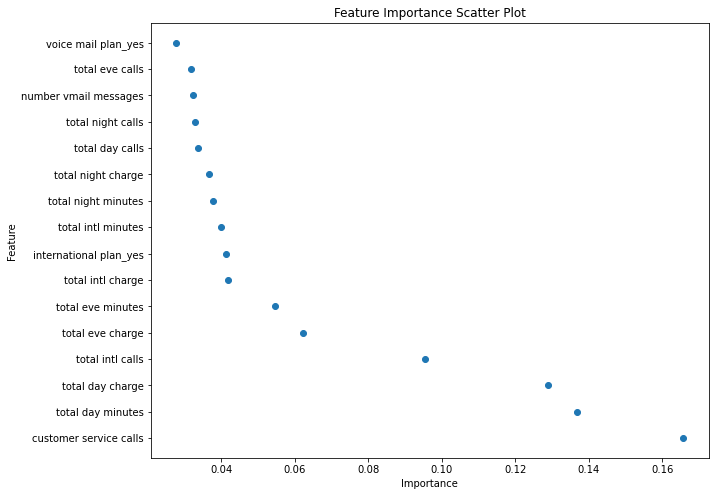

In [43]:
plt.figure(figsize=[10,8])
plt.scatter(feature_importances['importance'], feature_importances['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scatter Plot')
plt.yticks(rotation=0)  # To make feature names readable
plt.show()


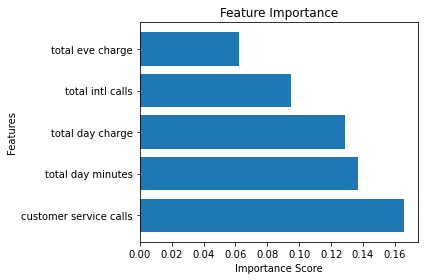

In [44]:
# Top Five important features
data = {"customer service calls": 0.166, "total day minutes": 0.137, "total day charge":0.129, "total intl calls": 0.095, "total eve charge": 0.062}

# Plotting the bar graph
fig, ax = plt.subplots()
ax.barh(list(data.keys()), list(data.values()))

# Customizing the appearance of bar graph
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")

# Spacing the bars apart
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# Showing the graph
plt.tight_layout()
plt.show()

 * The feature importance plot highlights key factors contributing to customer churn.
    * Customer service calls, total day minutes, and total day charge are identified as the most influential features.
    * To reduce churn and improve customer satisfaction, the telco businesses should focus on enhancing customer experience and services.
    * Monitoring the number of customer service calls is crucial, as a high volume may indicate customer dissatisfaction.
    * Implementing strategies to reduce daytime charges is also recommended.
    
 * These insights can inform the development of targeted retention and engagement programs.

## Model Deployment

In [45]:
import pickle

# Your trained model
model = rf2  # Assuming rf2 is your trained model

# Save the model to a pickle file with the name "ML_Model_Customer_Churn.pkl"
with open("ML_Model_Customer_Churn.pkl", "wb") as file:
    pickle.dump(model, file)


## Limitations

* Feature Relevance: 
    * Not all dataset features were impactful for predicting churn, leading to potential model inefficiencies.
    
    * lack of detailed information on states and area codes, prevented further in-depth exploration.
    
    * Addressing regional variations is paramount to crafting effective retention strategies.
      
* Modeling:

    * Model Selection: Despite using Logistic Regression, the focus was on tree-based models. Exploring models like gradient boosting or neural networks might enhance performance.
    
    * Further research and analysis, considering additional data sources and alternative modeling approaches, are recommended to enhance our understanding and strategy for reducing customer churn effectively. 
    
* External Factors:

    * Temporal Changes: The data might exhibit unnoticed trends over time, affecting the analysis.
    
    * Bias Concerns: Potential biases, such as geographic or demographic, in the dataset could skew results.
* Generalization:

    * Overfitting Risk: Models, especially complex ones like Random Forest, might overfit, necessitating robust validation and regularization.


## Recommendations

Based on the analysis, I derived several actionable insights that can help the business reduce customer churn. Implementing these strategies can lead to increased customer retention and, consequently, higher profitability.

- Focus on improving customer service as it's a major determinant of customer satisfaction.
- Engage with customers who have high daily usage as they are more likely to churn.
- Consider special plans or offers for long-term customers and regions with high churn rates to incentivize loyalty.

## Conclusion

In summary, our analysis unveils limitations in feature relevance, model selection, potential external influences, and the risk of overfitting. Despite these constraints, we derive actionable recommendations, emphasizing improvements in customer service, engagement with high-usage customers, and the implementation of loyalty incentives to mitigate churn. It's imperative for businesses to recognize and leverage these insights to enhance customer retention and drive profitability.

Additionally, we underscore the importance of addressing states or area codes with high churn rates, as these regions may require tailored strategies for effective churn reduction. Ongoing exploration and validation, potentially involving alternative modeling approaches, remain essential for refining churn reduction strategies.
